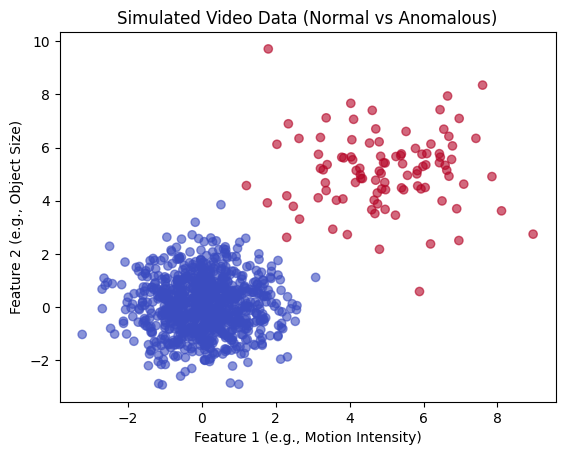

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate video data: 1000 frames with 2 features each (e.g., motion intensity, object size)
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=(900, 2))  # Normal activity
anomalous_data = np.random.normal(loc=5, scale=1.5, size=(100, 2))  # Anomalous activity

# Combine normal and anomalous data
video_data = np.vstack([normal_data, anomalous_data])
labels = np.hstack([np.zeros(900), np.ones(100)])  # 0 for normal, 1 for anomaly

# Visualize the data
plt.scatter(video_data[:, 0], video_data[:, 1], c=labels, cmap='coolwarm', alpha=0.6)
plt.title('Simulated Video Data (Normal vs Anomalous)')
plt.xlabel('Feature 1 (e.g., Motion Intensity)')
plt.ylabel('Feature 2 (e.g., Object Size)')
plt.show()


In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(video_data)

# Predict anomalies
predictions = model.predict(video_data)
# Convert predictions (-1 for anomaly, 1 for normal) to labels (0 for normal, 1 for anomaly)
predictions = np.where(predictions == -1, 1, 0)

# Performance evaluation
print(classification_report(labels, predictions, target_names=['Normal', 'Anomaly']))

# Confusion Matrix
cm = confusion_matrix(labels, predictions)
print("Confusion Matrix:")
print(cm)


              precision    recall  f1-score   support

      Normal       0.98      0.98      0.98       900
     Anomaly       0.80      0.80      0.80       100

    accuracy                           0.96      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.96      0.96      0.96      1000

Confusion Matrix:
[[880  20]
 [ 20  80]]


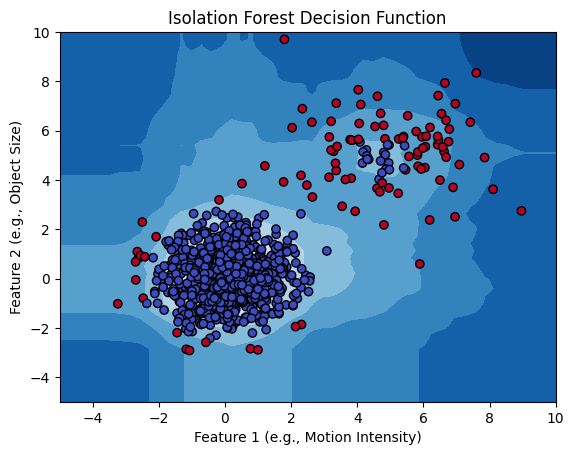

In [3]:
# Visualize decision function of the isolation forest
xx, yy = np.meshgrid(np.linspace(-5, 10, 50), np.linspace(-5, 10, 50))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Isolation Forest Decision Function")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

plt.scatter(video_data[:, 0], video_data[:, 1], c=predictions, cmap='coolwarm', edgecolor='k')
plt.xlabel('Feature 1 (e.g., Motion Intensity)')
plt.ylabel('Feature 2 (e.g., Object Size)')
plt.show()
